### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

# Новый раздел

# Новый раздел

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def generate_degrees(source_data: list, n: int):
    return np.array([
        source_data**i for i in range(1, n+1)
    ]).T

In [3]:
df = pd.read_csv("3.10_non_linear.csv")
df.head(3)

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040


In [13]:
X = generate_degrees(df.x_train, 8)
y = df.y_train.values
X.shape, y.shape

((50, 8), (50,))

In [14]:
ridge = Ridge(alpha=0.8).fit(X, y)
lasso = Lasso(alpha=0.8).fit(X, y)

/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.335e+00, tolerance: 3.191e-03
  model = cd_fast.enet_coordinate_descent(


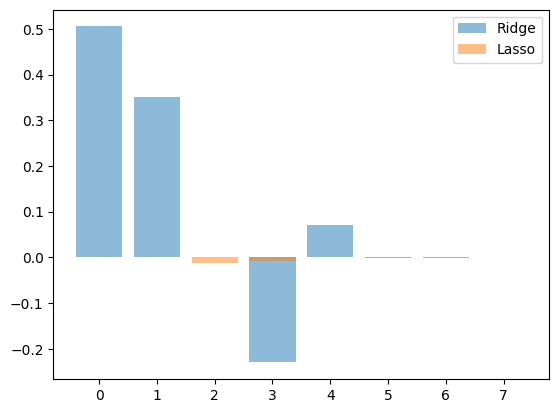

In [15]:
plt.bar(range(len(ridge.coef_)), ridge.coef_, alpha=0.5)
plt.bar(range(len(lasso.coef_)), lasso.coef_, alpha=0.5)
plt.legend(("Ridge", "Lasso"))
plt.show()

In [20]:
ridge_c = [f"{v:.3f}" for v in ridge.coef_]
lasso_c = [f"{v:.3f}" for v in lasso.coef_]

print(
    f"Ridge coefs: {ridge_c}\n"
    f"Lasso coefs: {lasso_c}"
)

Ridge coefs: ['0.505', '0.350', '-0.000', '-0.230', '0.070', '-0.001', '-0.002', '0.000']
Lasso coefs: ['-0.000', '-0.000', '-0.012', '-0.009', '0.001', '0.000', '0.000', '-0.000']


Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!